In [1]:
from Bio import Phylo
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [2]:
# Uploading metadata
meta = pd.read_csv("SGB3587_metadata_.tsv", sep="\t", index_col=0)
meta.head()

,sampleID,sex,bmi,age,smoking_state,study_group
magID,,,,,,
M1695505146,BP01008,male,26.122449,69,non-smoker,mucositis
M1357088918,BP01039,male,26.234568,53,smoker,healthy
M1973003636,BP01095,female,19.531250,63,non-smoker,periimplantitis
M1970119015,BP02008,male,24.691358,73,smoker,periimplantitis
M1263131280,BP03007,female,24.023809,46,non-smoker,periimplantitis


### Next functions were used to color the trees

In [3]:
# Function to assign colors to the leaves (study groups)
def assign_color(name):
    if meta.loc[name, 'study_group'] == 'mucositis':
        return 'purple'
    elif meta.loc[name, 'study_group'] == 'periimplantitis':
        return 'red'
    else:
        return 'green'
    
# Function to assign colors to the leaves (smoking history)
def assign_color_sm(name):
    if meta.loc[name, 'smoking_state'] == 'ex-smoker':
        return 'purple'
    elif meta.loc[name, 'smoking_state'] == 'smoker':
        return 'red'
    else:
        return 'green'
    

# Recursive function to color ancestors
def color_ancestors(node, color_map):
    if not node.clades:  # This is a leaf node
        return color_map[node.name]
    child_colors = set()
    for child in node.clades:
        child_color = color_ancestors(child, color_map)
        child_colors.add(child_color)
    # If all children have the same color, set the parent's color to that color
    node_color = child_colors.pop() if len(child_colors) == 1 else 'grey'
    color_map[node] = node_color
    return node_color

### Building the trees

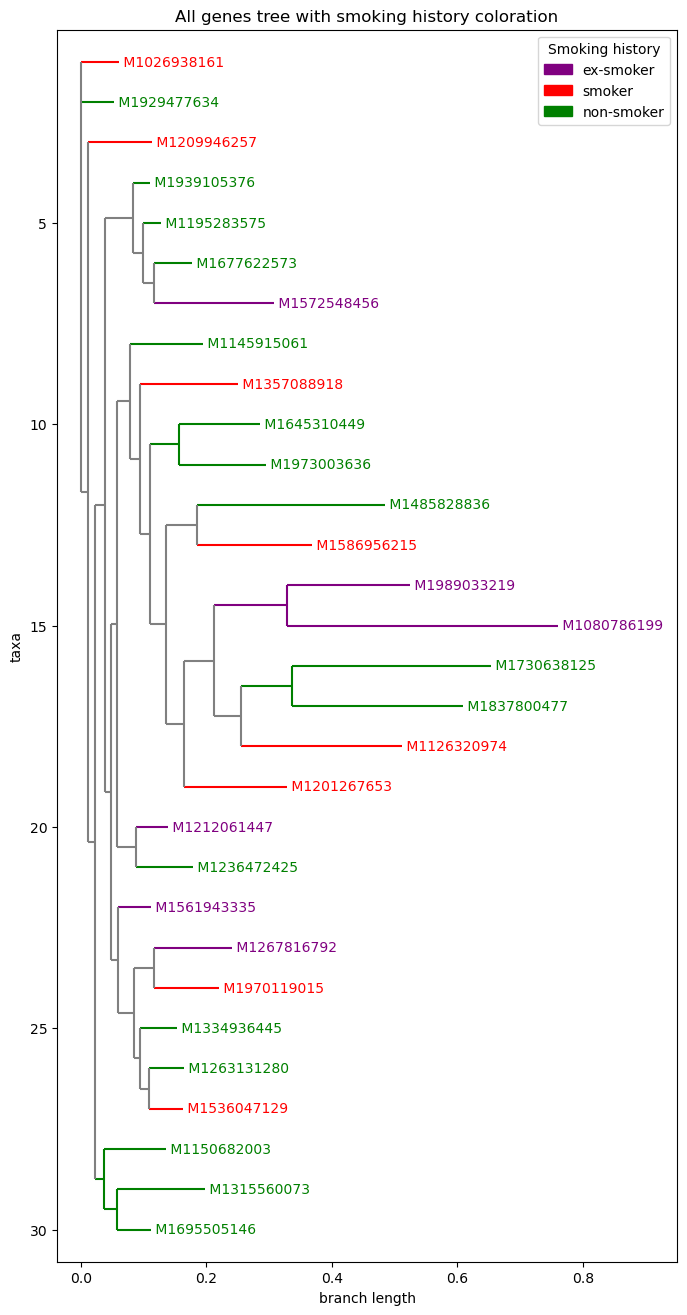

In [4]:
# Roary output file (all genes)
tree_path = "roary_output_w_aln (1)/accessory_binary_genes.fa.newick"
tree = Phylo.read(tree_path, "newick")
# Assigning colors to the leaves
color_map = {clade.name: assign_color_sm(clade.name) for clade in tree.get_terminals()}
for clade in tree.find_clades():
    if clade.name:
        color_map[clade] = assign_color_sm(clade.name)

# Color the ancestors
color_ancestors(tree.root, color_map)

fig = plt.figure(figsize=(8, 16), dpi=100)
axes = fig.add_subplot(1, 1, 1)

# Setting branch colors
for clade in tree.find_clades(order="level"):
    if clade in color_map:
        clade.color = color_map[clade]
    else:
        clade.color = 'black' 
# Creating a legend
legend_labels = {'ex-smoker': 'purple', 'smoker': 'red', 'non-smoker': 'green'}
legend_handles = [Patch(color=color, label=label) for label, color in legend_labels.items()]
# Setting the legend
plt.legend(handles=legend_handles, title='Smoking history', loc='upper right')
# Setting title
plt.title('All genes tree with smoking history coloration')
# Drawing the tree
Phylo.draw(tree, axes=axes, do_show=False, branch_labels=lambda clade: None, label_colors=color_map)

plt.show()
# Saving the tree
fig.savefig("tree_all_smoke.png")

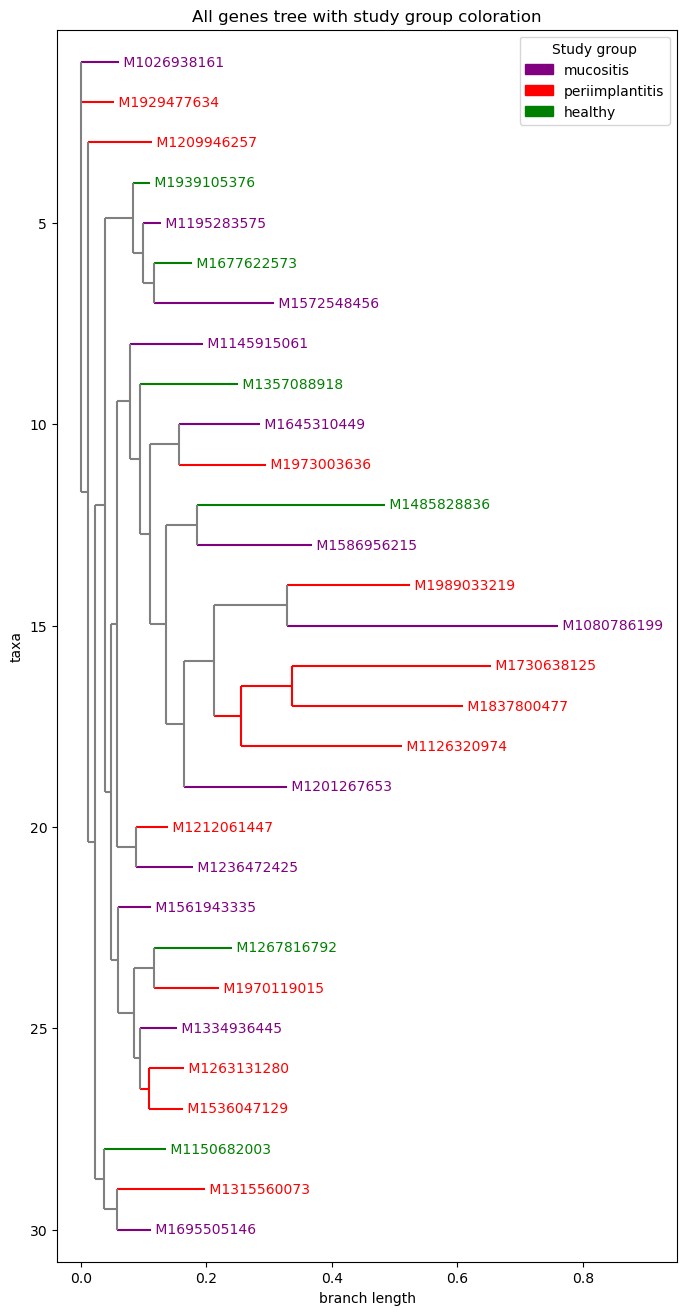

In [5]:
color_map = {clade.name: assign_color(clade.name) for clade in tree.get_terminals()}
for clade in tree.find_clades():
    if clade.name:
        color_map[clade] = assign_color(clade.name)

# Color the ancestors
color_ancestors(tree.root, color_map)


fig = plt.figure(figsize=(8, 16), dpi=100)
axes = fig.add_subplot(1, 1, 1)

# Setting branch colors
for clade in tree.find_clades(order="level"):
    if clade in color_map:
        clade.color = color_map[clade]
    else:
        clade.color = 'black' 
# Creating a legend    
legend_labels = {'mucositis': 'purple', 'periimplantitis': 'red', 'healthy': 'green'}
legend_handles = [Patch(color=color, label=label) for label, color in legend_labels.items()]
# Setting the legend
plt.legend(handles=legend_handles, title='Study group', loc='upper right')
# Setting title
plt.title('All genes tree with study group coloration')
# Drawing the tree
Phylo.draw(tree, axes=axes, do_show=False, branch_labels=lambda clade: None, label_colors=color_map)

plt.show()
# Saving the tree
fig.savefig("tree_all.png")

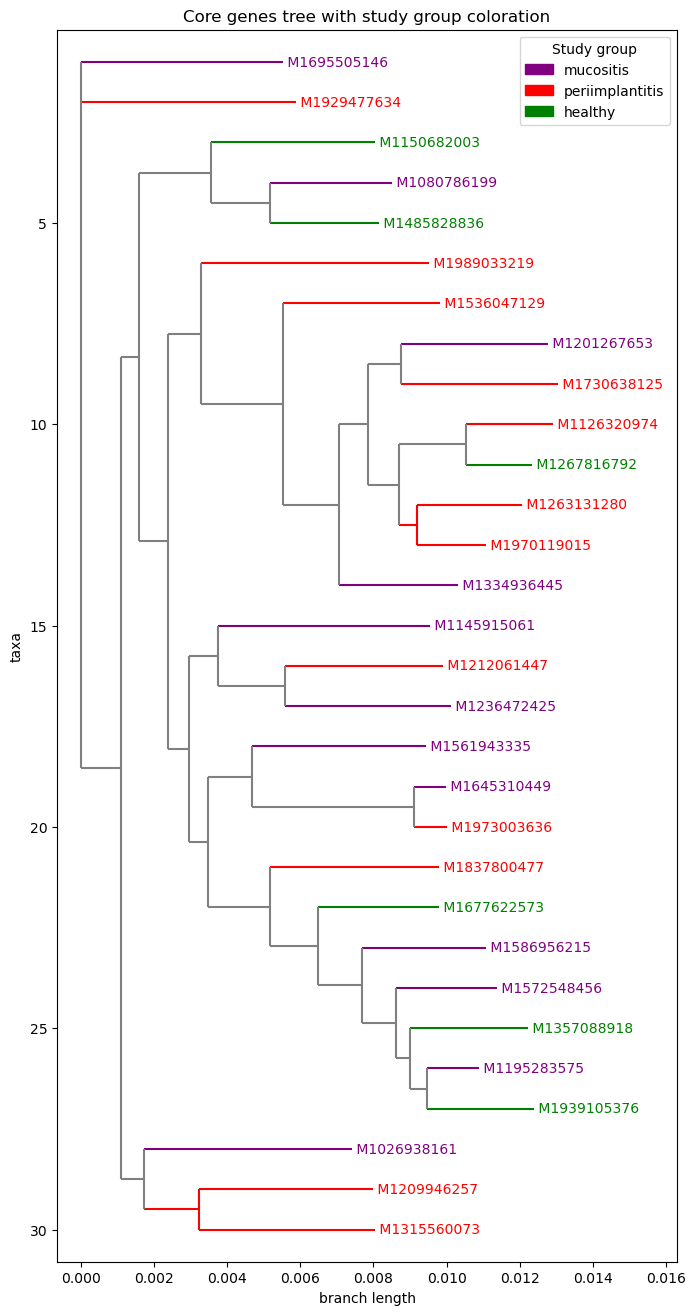

In [6]:
# FastTree output file
tree_path = "core_gene_phylogeny.nwk"
tree = Phylo.read(tree_path, "newick")
# Assigning colors to the leaves
color_map = {clade.name: assign_color(clade.name) for clade in tree.get_terminals()}
for clade in tree.find_clades():
    if clade.name:
        color_map[clade] = assign_color(clade.name)

# Coloring the ancestors
color_ancestors(tree.root, color_map)


fig = plt.figure(figsize=(8, 16), dpi=100)
axes = fig.add_subplot(1, 1, 1)


# Setting branch colors
for clade in tree.find_clades(order="level"):
    if clade in color_map:
        clade.color = color_map[clade]
    else:
        clade.color = 'black' 
# Creating legend 
legend_labels = {'mucositis': 'purple', 'periimplantitis': 'red', 'healthy': 'green'}
legend_handles = [Patch(color=color, label=label) for label, color in legend_labels.items()]
# Setting legend
plt.legend(handles=legend_handles, title='Study group', loc='upper right')
# Setting title
plt.title('Core genes tree with study group coloration')
# Drawing the tree
Phylo.draw(tree, axes=axes, do_show=False, branch_labels=lambda clade: None, label_colors=color_map)

plt.show()

# Saving the figure
fig.savefig("fasttree.png")

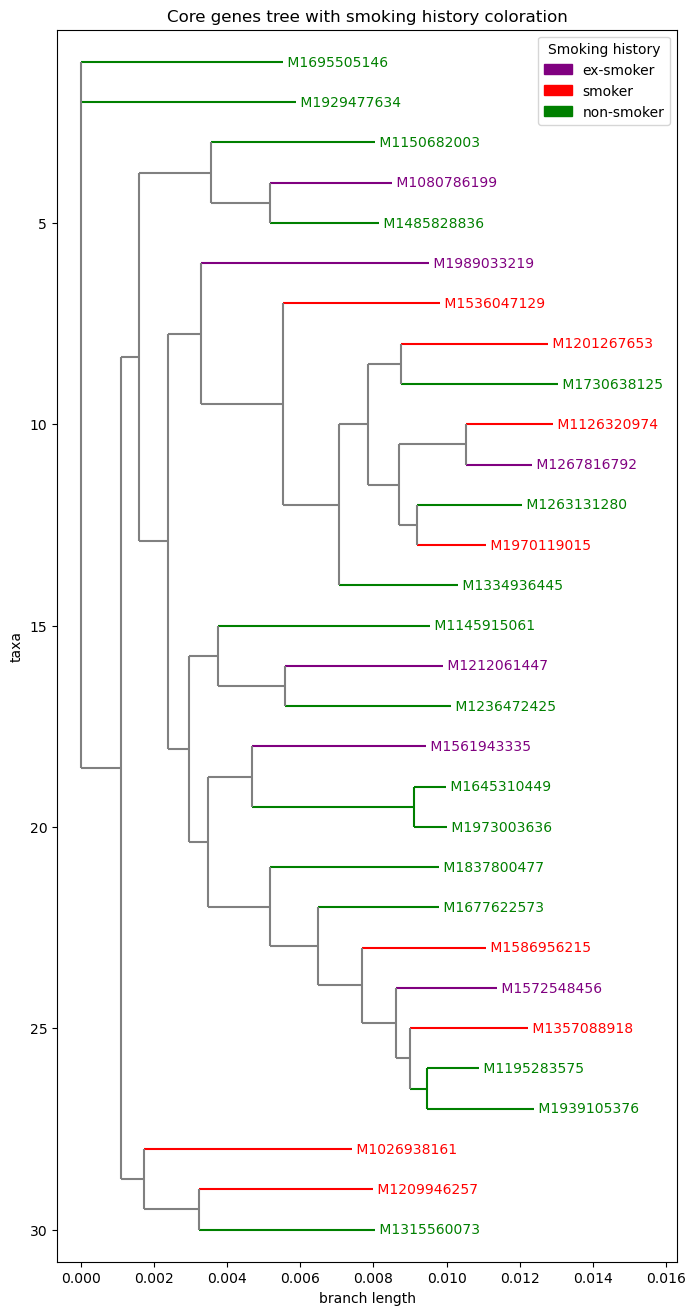

In [7]:
# Creating color map with leaf colors    
color_map = {clade.name: assign_color_sm(clade.name) for clade in tree.get_terminals()}
for clade in tree.find_clades():
    if clade.name:
        color_map[clade] = assign_color_sm(clade.name)

# Color the ancestors
color_ancestors(tree.root, color_map)

# Create figure
fig = plt.figure(figsize=(8, 16), dpi=100)
axes = fig.add_subplot(1, 1, 1)


# Setting branch colors
for clade in tree.find_clades(order="level"):
    if clade in color_map:
        clade.color = color_map[clade]
    else:
        clade.color = 'black' 
 # Creating legend       
legend_labels = {'ex-smoker': 'purple', 'smoker': 'red', 'non-smoker': 'green'}
legend_handles = [Patch(color=color, label=label) for label, color in legend_labels.items()]
# Setting legend
plt.legend(handles=legend_handles, title='Smoking history', loc='upper right')
# Setting title
plt.title('Core genes tree with smoking history coloration')
# Drawing the tree
Phylo.draw(tree, axes=axes, do_show=False, branch_labels=lambda clade: None, label_colors=color_map)

plt.show()
# Saving the figure
fig.savefig("fasttree_core_smoke.png")